In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

In [3]:
# my acquire and prepare file
import acquire
import prepare

from prepare import train_validate_test_split

## Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [27]:
### Acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [28]:
#Prepare titanic data
titanic_df = prepare.prep_titanic(titanic_df)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embark_town,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,Southampton,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,Cherbourg,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,Southampton,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,Southampton,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,Southampton,1,0,0,0,1


In [29]:
#Drop Columns not needed for modeling
titanic_df.drop(['embark_town'], axis=1, inplace=True)

In [30]:
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
#Train validate test split
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [7]:
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_df, target='survived', seed=123)

In [8]:
#check shape

In [9]:
# create X & y version of train, where y is a series with just the target variable and X are all the features.
X_train = train.drop(columns=['survived'])
y_train = train.survived
train.survived

866    1
862    1
785    0
577    1
135    0
      ..
775    0
308    0
404    0
202    0
272    1
Name: survived, Length: 499, dtype: int64

In [10]:
#Validate and Test 
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [11]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, did not survive

0    296
1    203
Name: survived, dtype: int64

In [12]:
#Establish Baseline
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 499 entries, 866 to 272
Series name: survived
Non-Null Count  Dtype
--------------  -----
499 non-null    int64
dtypes: int64(1)
memory usage: 7.8 KB


####  baseline prediction? 

In [13]:
#Baseline Accuracy
(y_train == 0).mean()

0.593186372745491

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [14]:
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

In [15]:
# model.fit(X, y)

tree.fit(X_train, y_train)

ValueError: could not convert string to float: 'Cherbourg'

In [16]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [ ]:
# Visualize the tree NOT WORKING
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [ ]:
#Use your model to make predictions on the in-sample data
tree.predict(X_train)

In [ ]:
predictions = tree.predict(X_train)
actual = y_train

In [ ]:
#Baseline accuracy
(y_train == 0).mean()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
confusion_matrix(actual, predictions)

In [ ]:
pd.crosstab(actual, predictions)

In [ ]:
print(classification_report(actual, predictions))

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
#On validate data
predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
      .format(tree.score(X_validate, y_validate)))

In [ ]:
acc = tree.score(X_train, y_train)
acc

In [ ]:
#Could calculate this way, need to define y predictions
#TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
#TP, FP, FN, TP

### 5. Run through steps 2-4 using a different max_depth value.

#### Using Tree 2, 4 levels of depth

In [ ]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=123)

In [ ]:
# model.fit(X, y)

tree2.fit(X_train, y_train)

In [ ]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

In [ ]:
#Use your model to make predictions on the in-sample data
tree2.predict(X_train)

In [ ]:
predictions = tree2.predict(X_train)
actual = y_train

#### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
confusion_matrix(actual, predictions)

In [ ]:
pd.crosstab(actual, predictions)

In [ ]:
print(classification_report(actual, predictions))

In [ ]:
#Calculating from validation data
predictions = tree2.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree2.score(X_train, y_train)))

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
      .format(tree2.score(X_validate, y_validate)))

### 6. Which model performs better on your in-sample data?

In [ ]:
#Tree2 (model 2) performs better on my sample (training) data

### 7. Which model performs best on your out-of-sample data, the validate set?


In [ ]:
#Tree 1 (model 1) performs better on the validate data

## CONCLUSIONS: By changing max depth to four levels, we increased accuracy slightly, but also made a more precise model (model 2 aka 'Tree 2' had a much lower false positive rate than model 1).

--------------------###------------------

## TELCO DATA SET

In [ ]:
### Acquire
df = acquire.get_telco_data()
df.head()

In [ ]:
#Prep telco data
def prep_telco_data(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
       
    # Drop null values stored as whitespace    
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    
    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)
    
    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    
    # Concatenate dummy dataframe to original 
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [ ]:
df = prep_telco_data(df)

In [ ]:
#Drop Columns not needed for modeling
df.drop(['gender','partner','dependents','phone_service','multiple_lines',\
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type', \
                              'paperless_billing', \
                              'churn'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
#Renaming churn encoded
df.rename(columns = {'churn_encoded':'churn'}, inplace = True)

In [ ]:
df.head().T

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='churn', seed=123)

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features.
X_train = train.drop(columns=['churn'])
y_train = train.churn
train.churn

In [ ]:
#check shape
train.shape
validate.shape
test.shape

In [ ]:
#Create validate and test data
#Validate and Test 
X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [ ]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, customer did not churn

In [ ]:
#Baseline Accuracy
(y_train == 0).mean()

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
# model.fit(X, y)

tree1.fit(X_train, y_train)

In [ ]:
print(export_text(tree1, feature_names=X_train.columns.tolist()))

In [ ]:
#Use your model to make predictions on the in-sample data
tree1.predict(X_train)

--------------------##Random Forest Exercises##--------------------------------

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [116]:
### Acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [117]:
#Prepare titanic data
titanic_df = prepare.prep_titanic(titanic_df)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [118]:
#Drop Columns not needed for modeling
titanic_df.drop(['embarked'], axis=1, inplace=True)

In [119]:
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


In [120]:
from prepare import train_validate_test_split

In [121]:
# split into train, validate, test
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [122]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [123]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [124]:
print(rf.feature_importances_)

[0.10507678 0.2479201  0.04239187 0.03582842 0.22278323 0.01603771
 0.29419316 0.01793043 0.00458469 0.01325362]


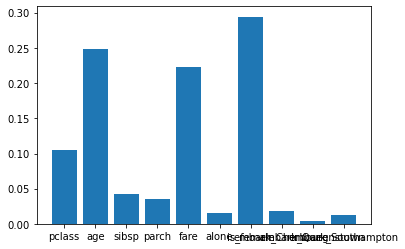

In [125]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [126]:
#Make predictions
y_pred = rf.predict(X_train)

In [127]:
rf.classes_

array([0, 1])

In [128]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.96532994, 0.03467006],
       [0.02452785, 0.97547215],
       [0.94546868, 0.05453132],
       ...,
       [0.72003194, 0.27996806],
       [0.8722148 , 0.1277852 ],
       [0.96686841, 0.03313159]])

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [129]:
#  mode for target?
y_train.mode()

0    0
Name: survived, dtype: int64

In [130]:
# Establish our baseline prediction 
baseline = y_train.mode()

# Next let establish a baseline accuracy
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.6


In [131]:
#Evaluate the model's performance on train
y_predictions = rf.predict(X_train)

In [132]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       338
           1       0.99      0.91      0.95       230

    accuracy                           0.96       568
   macro avg       0.96      0.95      0.96       568
weighted avg       0.96      0.96      0.96       568



In [133]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.96


In [134]:
# classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 10")
pd.DataFrame(report)

Tree of depth 10


,0,1,accuracy,macro avg,weighted avg
precision,0.941011,0.985849,0.957746,0.96343,0.959167
recall,0.991124,0.908696,0.957746,0.94991,0.957746
f1-score,0.965418,0.945701,0.957746,0.95556,0.957434
support,338.000000,230.000000,0.957746,568.00000,568.000000


In [135]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[335   3]
 [ 21 209]]


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

### Training Set

In [136]:
# sklearn confusion matrix
cm = confusion_matrix(y_train, y_predictions)
print(cm)

[[335   3]
 [ 21 209]]


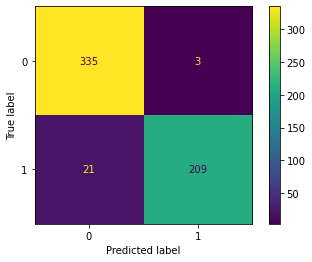

In [137]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [138]:
#Creating classification report on training data

TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(209, 335, 3, 21)

In [139]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9577464788732394
True Positive Rate: 0.908695652173913
False Positive Rate: 0.008875739644970414
True Negative Rate: 0.9911242603550295
False Negative Rate: 0.09130434782608696
Precision: 0.9858490566037735
Recall: 0.908695652173913
F1 Score: 0.9457013574660633
Support (0): 230
Support (1): 338


### Looking at performance on validate data

In [140]:
rf.score(X_validate, y_validate)

0.7638888888888888

In [141]:
#Accuracy of validate set
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.76


In [142]:
#predictions
y_pred = rf.predict(X_validate)

In [143]:
#Creating classification report on validate data

TN, FP, FN, TP = confusion_matrix(y_validate,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(15, 40, 3, 14)

In [144]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7638888888888888
True Positive Rate: 0.5172413793103449
False Positive Rate: 0.06976744186046512
True Negative Rate: 0.9302325581395349
False Negative Rate: 0.4827586206896552
Precision: 0.8333333333333334
Recall: 0.5172413793103449
F1 Score: 0.6382978723404256
Support (0): 29
Support (1): 43


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

### Model 2: min_samples_leaf = 3 and max_depth = 5

In [145]:
### Acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [146]:
#Prepare titanic data
titanic_df = prepare.prep_titanic(titanic_df)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [147]:
#Drop Columns not needed for modeling
titanic_df.drop(['embarked'], axis=1, inplace=True)

In [148]:
# split into train, validate, test
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [149]:
#Increasing min samples leaf and decreasing max depth
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [150]:
#Fit
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

In [151]:
#Print feature importances
print(rf2.feature_importances_)

[0.15169214 0.13432176 0.0338529  0.02892917 0.14856235 0.01425727
 0.44945571 0.01937189 0.00330919 0.01624763]


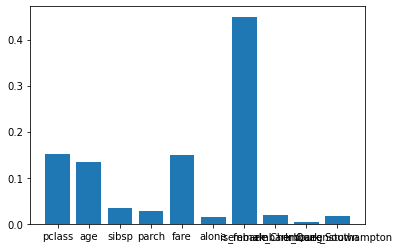

In [152]:
#Show feature importances
plt.bar(X_train.columns, rf2.feature_importances_)
plt.show()

#### Make Predictions

In [153]:
#predictions
y_pred = rf2.predict(X_train)

In [154]:
rf2.classes_

array([0, 1])

In [155]:
y_pred_proba = rf2.predict_proba(X_train)
y_pred_proba
#Tells the prediction of probability a being made

array([[0.87971655, 0.12028345],
       [0.20103229, 0.79896771],
       [0.88155373, 0.11844627],
       ...,
       [0.57331034, 0.42668966],
       [0.66271547, 0.33728453],
       [0.87971655, 0.12028345]])

#### Evaluate your results using the model score, confusion matrix, and classification report.

In [156]:
#  mode for target
y_train.mode()

0    0
Name: survived, dtype: int64

In [157]:
# Establish our baseline prediction 
baseline = y_train.mode()

# Next let establish a baseline accuracy
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.6


In [158]:
#Evaluate the model's performance on train
y_predictions = rf2.predict(X_train)

In [159]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       338
           1       0.92      0.69      0.79       230

    accuracy                           0.85       568
   macro avg       0.87      0.82      0.84       568
weighted avg       0.86      0.85      0.85       568



In [160]:
print('Accuracy of random forest classifier model 2 on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))

Accuracy of random forest classifier model 2 on training set: 0.85


In [161]:
# classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 5")
pd.DataFrame(report)

Tree of depth 5


,0,1,accuracy,macro avg,weighted avg
precision,0.820253,0.919075,0.850352,0.869664,0.860269
recall,0.958580,0.691304,0.850352,0.824942,0.850352
f1-score,0.884038,0.789082,0.850352,0.836560,0.845588
support,338.000000,230.000000,0.850352,568.000000,568.000000


#### Calculate accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [162]:
# sklearn confusion matrix
cm = confusion_matrix(y_train, y_predictions)
print(cm)

[[324  14]
 [ 71 159]]


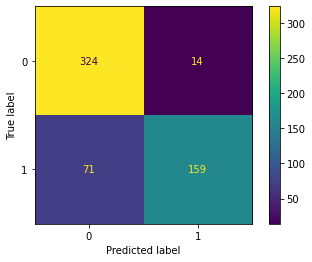

In [163]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)

disp.plot()
plt.show()

In [164]:
#Creating classification report on training data

TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(159, 324, 14, 71)

In [165]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8503521126760564
True Positive Rate: 0.691304347826087
False Positive Rate: 0.04142011834319527
True Negative Rate: 0.9585798816568047
False Negative Rate: 0.30869565217391304
Precision: 0.9190751445086706
Recall: 0.691304347826087
F1 Score: 0.7890818858560795
Support (0): 230
Support (1): 338


### Looking at performance on validate data

In [166]:
rf2.score(X_validate, y_validate)

0.7638888888888888

In [167]:
#Accuracy of validate set
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf2.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.76


In [168]:
#predictions
y_pred = rf2.predict(X_validate)

In [169]:
#Creating classification report on validate data

TN, FP, FN, TP = confusion_matrix(y_validate,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(13, 42, 1, 16)

In [170]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7638888888888888
True Positive Rate: 0.4482758620689655
False Positive Rate: 0.023255813953488372
True Negative Rate: 0.9767441860465116
False Negative Rate: 0.5517241379310345
Precision: 0.9285714285714286
Recall: 0.4482758620689655
F1 Score: 0.6046511627906977
Support (0): 29
Support (1): 43


### Model 3: min_leaf_samples = 3 and max_depth = 10

In [171]:
### Acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [172]:
#Prepare titanic data
titanic_df = prepare.prep_titanic(titanic_df)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [173]:
#Drop Columns not needed for modeling
titanic_df.drop(['embarked'], axis=1, inplace=True)

In [174]:
# split into train, validate, test
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [175]:
#Min samples leaf = 3 and max depth of 10
rf3 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [176]:
#Fit
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=123)

In [177]:
rf3.classes_

array([0, 1])

In [178]:
y_pred_proba = rf3.predict_proba(X_train)
y_pred_proba

array([[0.95758228, 0.04241772],
       [0.10956377, 0.89043623],
       [0.95028372, 0.04971628],
       ...,
       [0.63551761, 0.36448239],
       [0.80640004, 0.19359996],
       [0.96204809, 0.03795191]])

#### Evaluate your results using the model score, confusion matrix, and classification report.

In [179]:
#  mode for target
y_train.mode()

0    0
Name: survived, dtype: int64

In [180]:
#Evaluate the model's performance on train
y_predictions = rf3.predict(X_train)

In [181]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       338
           1       0.93      0.81      0.86       230

    accuracy                           0.90       568
   macro avg       0.90      0.88      0.89       568
weighted avg       0.90      0.90      0.89       568



In [182]:
print('Accuracy of random forest classifier model 3 on training set: {:.2f}'
     .format(rf3.score(X_train, y_train)))

Accuracy of random forest classifier model 3 on training set: 0.90


In [183]:
# classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 10")
pd.DataFrame(report)

Tree of depth 10


,0,1,accuracy,macro avg,weighted avg
precision,0.880109,0.925373,0.896127,0.902741,0.898438
recall,0.955621,0.808696,0.896127,0.882158,0.896127
f1-score,0.916312,0.863109,0.896127,0.889711,0.894769
support,338.000000,230.000000,0.896127,568.000000,568.000000


In [184]:
# sklearn confusion matrix
cm = confusion_matrix(y_train, y_predictions)
print(cm)

[[323  15]
 [ 44 186]]


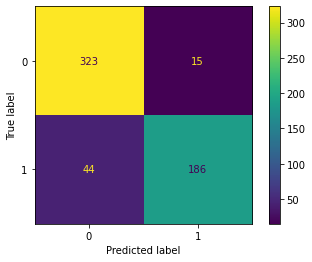

In [185]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf3.classes_)

disp.plot()
plt.show()

In [186]:
#Creating classification report on training data

TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(186, 323, 15, 44)

In [187]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8961267605633803
True Positive Rate: 0.808695652173913
False Positive Rate: 0.04437869822485207
True Negative Rate: 0.9556213017751479
False Negative Rate: 0.19130434782608696
Precision: 0.9253731343283582
Recall: 0.808695652173913
F1 Score: 0.8631090487238978
Support (0): 230
Support (1): 338


### Looking at performance on validate data

In [188]:
rf3.score(X_validate, y_validate)

0.7638888888888888

In [189]:
#Accuracy of validate set
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf3.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.76


In [190]:
#predictions
y_pred = rf3.predict(X_validate)

In [191]:
#Creating classification report on validate data

TN, FP, FN, TP = confusion_matrix(y_validate,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(14, 41, 2, 15)

In [193]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7638888888888888
True Positive Rate: 0.4827586206896552
False Positive Rate: 0.046511627906976744
True Negative Rate: 0.9534883720930233
False Negative Rate: 0.5172413793103449
Precision: 0.875
Recall: 0.4827586206896552
F1 Score: 0.6222222222222222
Support (0): 29
Support (1): 43


### CONCLUSION:
After making a few models, which one has the best performance (or closest metrics) on both train and validate?

-------## KNN Problems ##-------------

## 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [4]:
### Acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
#Prepare titanic data
titanic_df = prepare.prep_titanic(titanic_df)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embark_town,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,Southampton,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,Cherbourg,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,Southampton,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,Southampton,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,Southampton,1,0,0,0,1


In [6]:
#Drop Columns not needed for modeling
titanic_df.drop(['embark_town'], axis=1, inplace=True)

In [7]:
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


In [8]:
# split into train, validate, test
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_df, target='survived', seed=123)

In [9]:
#Impute age
train, validate, test = prepare.impute_mean_age(train, validate, test)

In [11]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [14]:
#X_train.shape
#X_validate.shape
X_test.shape

(134, 10)

In [15]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [16]:
knn

KNeighborsClassifier()

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_train)

In [21]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       ...,
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8]])

### 2. evaluate your results using the model score, confusion matrix, and classification report.

In [22]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [23]:
print(confusion_matrix(y_train, y_pred))

[[330  54]
 [ 77 162]]


In [24]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       384
           1       0.75      0.68      0.71       239

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.77       623
weighted avg       0.79      0.79      0.79       623



In [25]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,330,54
1,77,162


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


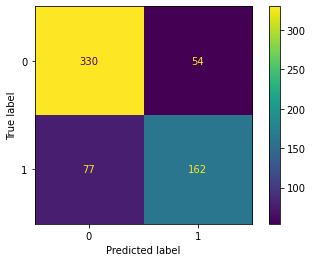

In [26]:
plot_confusion_matrix(knn, X_train, y_train)

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [27]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [28]:
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(162, 330, 54, 77)

In [29]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7897271268057785
True Positive Rate: 0.6778242677824268
False Positive Rate: 0.140625
True Negative Rate: 0.859375
False Negative Rate: 0.32217573221757323
Precision: 0.75
Recall: 0.6778242677824268
F1 Score: 0.7120879120879122
Support (0): 239
Support (1): 384


### Performance on Validate Data

In [30]:
print('Accuracy of KNN (k=5) classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN (k=5) classifier on validate set: 0.76


In [31]:
#Establish predictions from validate data
y_pred = knn.predict(X_validate)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


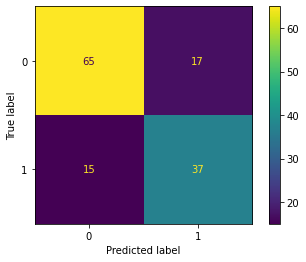

In [32]:
plot_confusion_matrix(knn, X_validate, y_validate)

In [33]:
TN, FP, FN, TP = confusion_matrix(y_validate, y_pred).ravel()

ALL = TP + TN + FP + FN

TP, TN, FP, FN

(37, 65, 17, 15)

In [34]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7611940298507462
True Positive Rate: 0.7115384615384616
False Positive Rate: 0.2073170731707317
True Negative Rate: 0.7926829268292683
False Negative Rate: 0.28846153846153844
Precision: 0.6851851851851852
Recall: 0.7115384615384616
F1 Score: 0.6981132075471698
Support (0): 52
Support (1): 82


### 4. Run through steps 2-4 setting k to 10

In [35]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [36]:
#Fit
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
y_pred = knn.predict(X_train)

In [38]:
y_pred_proba = knn.predict_proba(X_train)

#### evaluate your results using the model score, confusion matrix, and classification report.

In [39]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.76


In [40]:
print(confusion_matrix(y_train, y_pred))

[[349  35]
 [116 123]]


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


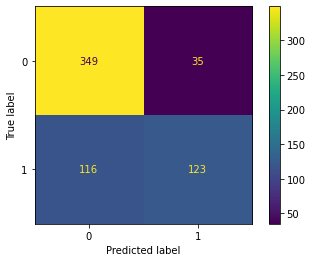

In [41]:
plot_confusion_matrix(knn, X_train, y_train)

In [42]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

ALL = TP + TN + FP + FN

TP, TN, FP, FN

(123, 349, 35, 116)

In [43]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7576243980738363
True Positive Rate: 0.5146443514644351
False Positive Rate: 0.09114583333333333
True Negative Rate: 0.9088541666666666
False Negative Rate: 0.48535564853556484
Precision: 0.7784810126582279
Recall: 0.5146443514644351
F1 Score: 0.6196473551637279
Support (0): 239
Support (1): 384


### Performance on Validate Data

In [44]:
print('Accuracy of KNN (k=10) classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN (k=10) classifier on validate set: 0.69


In [45]:
#Establish predictions from validate data
y_pred = knn.predict(X_validate)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


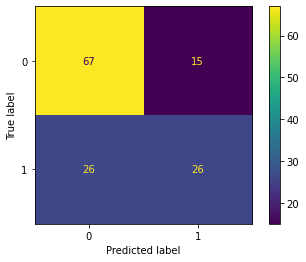

In [46]:
plot_confusion_matrix(knn, X_validate, y_validate)

In [47]:
TN, FP, FN, TP = confusion_matrix(y_validate, y_pred).ravel()

ALL = TP + TN + FP + FN

TP, TN, FP, FN

(26, 67, 15, 26)

In [48]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.6940298507462687
True Positive Rate: 0.5
False Positive Rate: 0.18292682926829268
True Negative Rate: 0.8170731707317073
False Negative Rate: 0.5
Precision: 0.6341463414634146
Recall: 0.5
F1 Score: 0.5591397849462365
Support (0): 52
Support (1): 82


### 5. Run through steps 2-4 setting k to 20

In [63]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [64]:
#Fit
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [65]:
y_pred = knn.predict(X_train)

In [66]:
y_pred_proba = knn.predict_proba(X_train)

In [67]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.72


In [68]:
print(confusion_matrix(y_train, y_pred))

[[349  35]
 [141  98]]


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


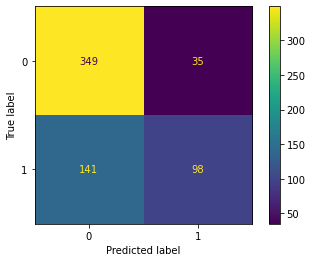

In [69]:
plot_confusion_matrix(knn, X_train, y_train)

In [70]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

ALL = TP + TN + FP + FN

TP, TN, FP, FN

(98, 349, 35, 141)

In [71]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7174959871589085
True Positive Rate: 0.4100418410041841
False Positive Rate: 0.09114583333333333
True Negative Rate: 0.9088541666666666
False Negative Rate: 0.5899581589958159
Precision: 0.7368421052631579
Recall: 0.4100418410041841
F1 Score: 0.5268817204301075
Support (0): 239
Support (1): 384


### Performance on Validate Data

In [72]:
print('Accuracy of KNN (k=20) classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN (k=20) classifier on validate set: 0.72


In [73]:
#Establish predictions from validate data
y_pred = knn.predict(X_validate)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


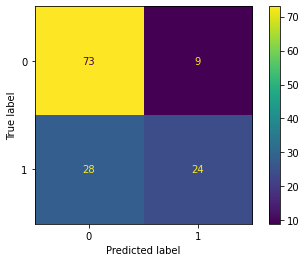

In [74]:
plot_confusion_matrix(knn, X_validate, y_validate)

In [75]:
TN, FP, FN, TP = confusion_matrix(y_validate, y_pred).ravel()

ALL = TP + TN + FP + FN

TP, TN, FP, FN

(24, 73, 9, 28)

In [76]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7238805970149254
True Positive Rate: 0.46153846153846156
False Positive Rate: 0.10975609756097561
True Negative Rate: 0.8902439024390244
False Negative Rate: 0.5384615384615384
Precision: 0.7272727272727273
Recall: 0.46153846153846156
F1 Score: 0.5647058823529413
Support (0): 52
Support (1): 82


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

### For in-sample Data
#### Model 1 (k =5)

#### Model 2 (k=10)

#### Model 3 (k=20)


In [112]:
### The first model appears to perform better on in-sample data in some key measures (accuracy 76%), and leads
### the three models in Recall (65%). Model 2 has slightly better precision but lower accuracy and a lower recall (51%).
### The last model performs almost last in all metrics.

### 7. Which model performs best on our out-of-sample data from validate?

In [ ]:
#The first model performs best on out of sample data (accuracy 76 percent). The third model performs
# slightly better on out of sample data (validate)

In [77]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, did not survive

0    384
1    239
Name: survived, dtype: int64

In [78]:
#Baseline Accuracy
(y_train == 0).mean()

0.6163723916532905

In [ ]:
# The first model 